In [1]:
from keras.datasets import mnist
import time

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
train_images = train_images_original.astype('float32') / 255
test_images = test_images_original.astype('float32') / 255



Using TensorFlow backend.


In [0]:
import numpy as np
def find_num_regions(im):
  queue = []
  visited = []
  num_regions = 0
  
  for row in range(28):
    for col in range(28):
      
      if (row,col) not in visited and im[row][col] < 0.5:
        num_regions += 1
        
        queue.append((row,col))
        visited.append((row,col))
        
        while len(queue) > 0:
          (vr,vc) = queue.pop()
          
          if (vr - 1, vc) not in visited and vr - 1 >= 0 and im[vr - 1][vc] < 0.5:
            queue.append((vr - 1, vc))
            visited.append((vr - 1,vc))
          if (vr + 1, vc) not in visited and vr + 1 < 28 and im[vr + 1][vc] < 0.5:
            queue.append((vr + 1, vc))
            visited.append((vr + 1,vc))
          if (vr, vc - 1) not in visited and vc - 1 >= 0 and im[vr][vc - 1] < 0.5:
            queue.append((vr, vc - 1))
            visited.append((vr,vc - 1))
          if (vr, vc + 1) not in visited and vc + 1 < 28 and im[vr][vc + 1] < 0.5:
            queue.append((vr, vc + 1))
            visited.append((vr,vc + 1))
  
  return num_regions/3

In [3]:
regions_train = np.empty(60000)
regions_test = np.empty(10000)
import sys
  
start = time.time()
for i in range(60000):
  regions_train[i] = find_num_regions(train_images[i])
  sys.stdout.write('\r')
  sys.stdout.write("%d/60000 training images processed." % i + 1)
print()
for i in range(10000):
  regions_test[i] = find_num_regions(test_images[i])
  sys.stdout.write('\r')
  sys.stdout.write("%d/10000 training images processed." % i + 1)
end = time.time()

print(end - start)

print(regions_train)

59999/60000 training images processed.
9999/10000 training images processed.2452.9655663967133
[0.33333333 0.66666667 0.33333333 ... 0.33333333 0.33333333 1.        ]


In [7]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images_original.reshape((10000, 28 * 28))

reg_train = regions_train.reshape((60000,1))
reg_test = regions_test.reshape((10000,1))
train_ims = np.append(train_images,reg_train, axis=1)
test_ims = np.append(test_images,reg_test, axis=1)
print(train_ims)

[[0.         0.         0.         ... 0.         0.         0.33333333]
 [0.         0.         0.         ... 0.         0.         0.66666667]
 [0.         0.         0.         ... 0.         0.         0.33333333]
 ...
 [0.         0.         0.         ... 0.         0.         0.33333333]
 [0.         0.         0.         ... 0.         0.         0.33333333]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [10]:

for i in range(60000):
  sys.stdout.write('\r')
  sys.stdout.write("%d/60000 training images processed." % (i + 1))

60000/60000 training images processed.

In [0]:
import time

start = time.time()
p = find_num_regions(train_images[3242])
end = time.time()
print(end - start)
print(p)

print(train_labels_original[3242])

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [18]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28 + 1,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 10
history = network.fit(train_ims, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_ims, test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               616224    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7850      
Total params: 624,074
Trainable params: 624,074
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 1.0856 - acc: 0.7695 - val_loss: 1.9649 - val_acc: 0.8736
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.5012 - acc: 0.8812 - val_loss: 1.6557 - val_acc: 0.8945
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.4010 - acc: 0.8967 - val_loss: 1.5195 - val_acc: 0.9040
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step 

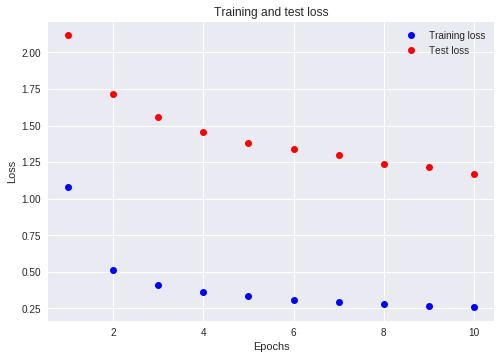

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()